

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description   

 The Dataset that has been selected is the `No-show appointments` and this dataset contains information about wither the patient show for the appointments or not, with other attributes and information, the data contain around 100k medical record about appointments. The column (information) that dataset contains are with its description (form the first observation):  
| **Field**                                        | **Description**                                                                   | **Type**   |
|--------------------------------------------------|-----------------------------------------------------------------------------------|------------|
| **PatientId**                                    | The identification of the patient                                                 | number     |
| **AppointmentID**                                | The identification of the appointment                                             | number     |
| **Gender**                                       | Female/Male                                                                       | string     |
| **ScheduledDay**                                 | The date and time when the patient scheduled the appointment                      | DateTime   |
| **AppointmentDay**                               | The date and time for the appointment                                             | DateTime   |
| **Age**                                          | The age of the patient                                                            | number     |
| **Neighbourhood**                                | The location for the appointment (where the hospital is located)                  | string     |
| **Scholarship**                                  | Whether the patient is enrolled in the Brazilian welfare program or not           | boolean    |
| **Hypertension, Diabetes, Alcoholism** | Indicate whether the patient has these medical issues or not                      | boolean    |
| **Handcap**                                 | The number of disabilities a person has                        | number     |
| **SMS_received**                                 | Indicate whether the patient got reminder SMS or not 0 mean they got SMS , 1 mean they did not get SMS                        | boolean     |
| **No-show**                                      | Whether the patient shows up for the appointment or not (No = show, Yes = no-show)| string     |  


--------------------------------------------------------------------------------

>  Other investigation about the dataset will be throw the project process 




### Question(s) for Analysis
- What is the overall no-show rate?
- What is the relation between the age and the patient not showing up for an appointment?
- How does receiving an SMS reminder affect the likelihood of attending the appointment?
-  What the affect of the patient having a scholarship on the rate of a not showing at the appointment?


In [328]:
# import statements for all of the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

#Remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [329]:
#Load the data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv') 

# Display 5 rows of data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [330]:
#Print the number of rows and the number of columns
print(f'# of rows {df.shape[0]:,} , # of columns {df.shape[1]:,}')

# of rows 110,527 , # of columns 14


>`From the output we can see that the number of rows is equal to 110527 and the number of columns is equal to 14`

In [331]:
#Print some information about the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> `From the last output we can see that there an issue in values in one of the attributes that shown in the min and max and will dive into it later in the project`

In [332]:
#Display each attribute of the columns of the dataset
print("The attributes that are in the dataset are:")
for attribute in df.columns:
    print('- '+attribute)

The attributes that are in the dataset are:
- PatientId
- AppointmentID
- Gender
- ScheduledDay
- AppointmentDay
- Age
- Neighbourhood
- Scholarship
- Hipertension
- Diabetes
- Alcoholism
- Handcap
- SMS_received
- No-show



> `From the output From the previous cell we can see that there are some of the attributes can be dropped out because can be non relevant to the main topic 
" if the patent shows up in the appointment or not"
The attributes that can be dropped out:`
- `PatientId`
- `AppointmentIDS` 



In [333]:

#function to print the attributes types for the dataset (the function will be used multiple times)
def print_data_types(df):
    print(df.dtypes)

In [334]:
#print the attributes types by using a function
print("column           data-type\n")
print_data_types(df)



column           data-type

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


> `From the output From the previous cells we can indicate that there some of the attribute that must be converted to the right format such as:`
- `ScheduledDay and AppointmentDay are object (string) and need to be converted to DateTime`
- `Scholarship, Hipertension, Diabetes, Alcoholism are int64 and need to be converted to boolean`
- `PatientId is float64 and need to be converted to int64`
- `SMS_received is int64 and need to be converted to boolean`


In [335]:
# print information about the dataset
print("Column        #Of null values\n")  
print(df.isnull().sum())

Column        #Of null values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


> `From the output of the previous cell we can indicate that there are no missing values in the attributes`

In [336]:
# function to print the number of unique values for each attribute

def print_attributes_with_numbers_unique_values(df):
    print("Column         # of unique values\n")
    print(df.nunique())
    print("******************")
   

In [337]:
#print the number of unique values for each attribute
print("The number of unique values for each attribute")
print_attributes_with_numbers_unique_values(df)

The number of unique values for each attribute
Column         # of unique values



PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64
******************


> `From the output from the previous cell we can see that there some of the string attributes that have less number of unique values and can be converted to category and they are:`  
- `Gender`
- `Neighbourhood`


In [338]:
#Print the unique values and its count for the columns
def print_unique_value_with_their_count(df,columns):
    for col in columns:
        print("The values of the column `{}` are : ".format(col))
        print(df[col].value_counts())
        print("***********************\n")

In [339]:
#Display some attributes values and their counts
columns=["No-show","SMS_received","Scholarship","Age" ]
print_unique_value_with_their_count(df,columns)

The values of the column `No-show` are : 
No     88208
Yes    22319
Name: No-show, dtype: int64
***********************

The values of the column `SMS_received` are : 
0    75045
1    35482
Name: SMS_received, dtype: int64
***********************

The values of the column `Scholarship` are : 
0    99666
1    10861
Name: Scholarship, dtype: int64
***********************

The values of the column `Age` are : 
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 18     1487
 44     1487
 58     1469
 46     1460
 45     1453
 21     1452
 28     1448
 31     1439
 20     1437
 7      1427
 55     1425
 8      1424
 60     1411
 29     1403
 16     1402
 40     1402
 48     1399
 47     1394
 35     1378
 27     1377
 22 

> `From the Cell that show the types of the attribuetes and th previous code cell we can indicate that:`
 - `No-show is object(string) and need to be converted to int (Yes to 1 and No to 0) to make the plot process easier`

In [340]:
#Print the the total number of dublicate rows
print("The total number of duplicated rows is : ",df.duplicated().sum())

The total number of duplicated rows is :  0


In [341]:


#Display some information about the attributes 
def print_min_max_values_of_attributes(df):
    for col in df.select_dtypes(include=['number']).columns:
        print(col)
        print("The min value for the attributes is:")
        print(np.min(df[col]))
        print("The max value for the attributes is:")
        print(np.max(df[col]))
        print("\n*****************************************\n")


In [342]:
#Print the min and max for the attributes

print_min_max_values_of_attributes(df)

PatientId
The min value for the attributes is:
39217.84439
The max value for the attributes is:
999981631772427.0

*****************************************

AppointmentID
The min value for the attributes is:
5030230
The max value for the attributes is:
5790484

*****************************************

Age
The min value for the attributes is:
-1
The max value for the attributes is:
115

*****************************************

Scholarship
The min value for the attributes is:
0
The max value for the attributes is:
1

*****************************************

Hipertension
The min value for the attributes is:
0
The max value for the attributes is:
1

*****************************************

Diabetes
The min value for the attributes is:
0
The max value for the attributes is:
1

*****************************************

Alcoholism
The min value for the attributes is:
0
The max value for the attributes is:
1

*****************************************

Handcap
The min value for the at

`From the output from the previous cell we can see that there some of the value that is not make sense
such as :`
- `in the age column the min value is -1 and the max value is 115 and that beyond the normal people ages`

In [343]:
#Print the count of people that have age less than 0 and equal or older than 100
print("The number of patients that have age less than 0 is : {} The number of patients that their age is 100 or older than 100 is : {}".format(df.query("Age<0").shape[0],df.query("Age>=100").shape[0]))


The number of patients that have age less than 0 is : 1 The number of patients that their age is 100 or older than 100 is : 11


> `After choosing that the wanted range for the Age attribute is from 0 to 99 (0 mean new born), display the count of the total number and it seems that the total number is 12 and compared to the total number of patients is nothing so they will be deleted later in the cleaning process`

### Conclusion for Exploring The DataSet 
- The DataSet has 14 attributes
- The attributes types are float64, int64, and object(string) as has been shown in the previous cells
- There some attributes type need to be converted 
- There are no missing values in the DataSet
- There are no duplicated values in the DataSet
- There is a wrong range limit in the DataSet for the age attribute



### Data Cleaning


`After explore the dataset in the previous section, there some problems that have been detected `


`The problems that the dataset has:`

    - Non relevant attributes
    - wrong Data Type
      - object to DateTime
      - object to category
      - object to int
      - int64 to boolean
    - Wrong range value for the age attribute

In [344]:
# Remove the attributes that are not relevant 
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [345]:
#Define a function to convert the types of the attributes
def convert_data_type(df,column_To_convert):
    for key,type in column_To_convert.items():
        df[key] = df[key].astype(type)

In [346]:
#Define the column that needed to convert the data type of them and then call convert_data_type function to convert them
column_To_convert={"Gender":"category","Neighbourhood":"category" ,"Scholarship":"bool" ,"Hipertension":"bool", "Diabetes" :"bool" ,"Alcoholism":"bool","SMS_received":"bool"}
convert_data_type(df,column_To_convert)

In [347]:
#Convert the value of No-show column to int and replace Yes to 1 and No to 0 to make it easy to calculate the mean and analyze the plots 
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1}).astype(int)


In [348]:
#Define a function to convert the data type to datetime
def convert_date_time_type(df,key):
    df[key]=pd.to_datetime(df[key])


In [349]:
#Call the function convert_date_time_type to convert the attributes ScheduledDay and AppointmentDay from object to datetime
convert_date_time_type(df,"ScheduledDay")
convert_date_time_type(df,"AppointmentDay")

In [350]:
#Print some rows of the data set to confirm that the types of the attributes have been converted 
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,0


In [351]:
#Call a function to print the attributes and their types after converting their types
print_data_types(df)

Gender                       category
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                category
Scholarship                      bool
Hipertension                     bool
Diabetes                         bool
Alcoholism                       bool
Handcap                         int64
SMS_received                     bool
No-show                         int32
dtype: object


In [352]:
#Drop the rows that they have age less than 0 and greater than 99 
df = df.query('0 <= Age <= 99')


In [353]:
#Print the min and max values for each attribute
print_min_max_values_of_attributes(df)

Age
The min value for the attributes is:
0
The max value for the attributes is:
99

*****************************************

Handcap
The min value for the attributes is:
0
The max value for the attributes is:
4

*****************************************

No-show
The min value for the attributes is:
0
The max value for the attributes is:
1

*****************************************



>`From the last output we can see that the min value of the age become 0 and the max become 99`

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 -> What is the overall no-show rate?

In [354]:
# Calculate the overall no-show rate (mean)
no_show_mean=np.mean(df['No-show'])
print("The Mean for No-Show column:", no_show_mean)

no_show_column = df['No-show']

# Get the unique values in the 'No-show' column

unique_no_show_column_values = np.unique(no_show_column)



# Initialize an empty list to store the means
means = []

# Calculate the mean for each column of the data set depend on the no-show column values 
for value in unique_no_show_column_values:
    mean_value = np.mean(df[no_show_column == value],axis=0)
    means.append(mean_value)
    
print("********************************")

# Print the means for each column in the dataset
for i, value in enumerate(unique_no_show_column_values):
    print("Mean for '{}':\n{}\n".format(value, means[i]))
    
print()

The Mean for No-Show column: 0.20192734018006606
********************************
Mean for '0':
Age             37.784476
Scholarship      0.093913
Hipertension     0.204401
Diabetes         0.073844
Alcoholism       0.030420
Handcap          0.022710
SMS_received     0.291341
No-show          0.000000
dtype: float64

Mean for '1':
Age             34.306820
Scholarship      0.115522
Hipertension     0.169027
Diabetes         0.064080
Alcoholism       0.030337
Handcap          0.020165
SMS_received     0.438430
No-show          1.000000
dtype: float64




> From the previous output we can see that the mean the no-show column is 0.2 and its indicate that the values are clustered around 0 (No) and that mean that the patent are tend to show for the appointment 

### Research Question 2 -> What is the relation between the age and the patient not showing up for an appointment?

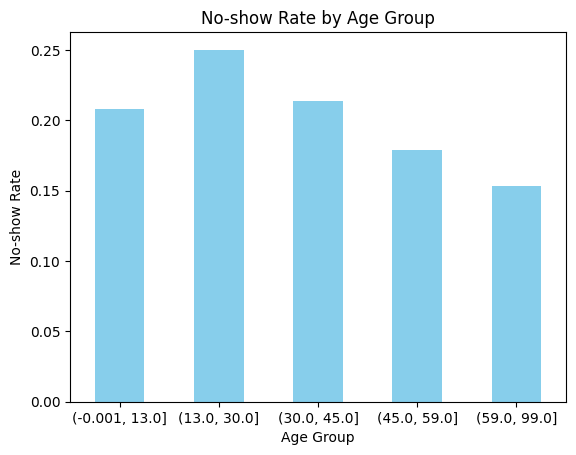

*****************************
Each age group and their mean:
AgeGroup
(-0.001, 13.0]    0.208230
(13.0, 30.0]      0.250298
(30.0, 45.0]      0.213720
(45.0, 59.0]      0.178932
(59.0, 99.0]      0.153057
Name: No-show, dtype: float64


In [355]:
%matplotlib inline
# Copy the age column and the not-show column into new variable to analyze and plot
age_not_show_data_to_analyze = df[['Age', 'No-show']].copy()

# Convert the age column to groups 
number_of_groups = 5  #Set the number of groups equal to 5
age_not_show_data_to_analyze['AgeGroup'] = pd.qcut(age_not_show_data_to_analyze['Age'], q=number_of_groups)
# Calculate the no-show rate for each age group
age_no_show_mean = age_not_show_data_to_analyze.groupby('AgeGroup')['No-show'].mean()
# Plot the no-show rate (mean) by age group
age_no_show_mean.plot(kind='bar', color='skyblue')
pl.title('No-show Rate by Age Group')
pl.xlabel('Age Group')
pl.ylabel('No-show Rate')
pl.xticks(rotation=0)
# Display the plot
pl.show()
print("*****************************")
#Print the range of each age group and their mean
print("Each age group and their mean:")
print(age_no_show_mean)


> `From the calculated mean for the age groups it shows that the majority of patients their are from age 0 to 45.`

>  `From the Plot we can see that the younger age groups have a high rate to not show for the appointment and the older age groups have a low rate to not show for the appointment`

### Research Question 3  -> How does receiving an SMS reminder affect the likelihood of attending the appointment?

In [356]:
# Remove the data that the ScheduledDay of the appointment was as same as AppointmentDay
# because if they are the same that mean that the patient is already at the hospital and will not receive a SMS message
# and that will effect the analysis
data_to_analyze=df.query("AppointmentDay!=ScheduledDay")



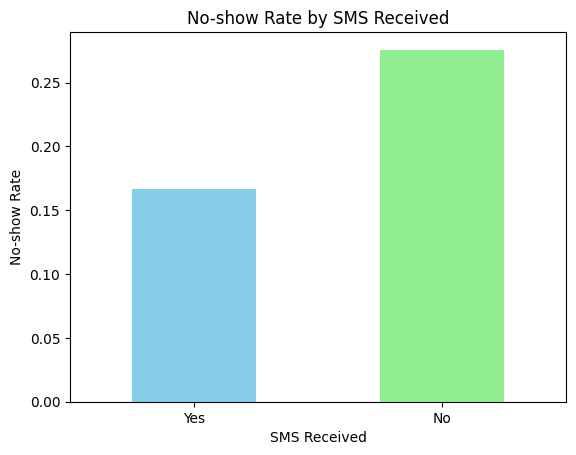

In [357]:
%matplotlib inline
sms_not_show_data_to_analyze = data_to_analyze[['SMS_received', 'No-show']].copy()
sms_no_show_mean = sms_not_show_data_to_analyze.groupby('SMS_received')['No-show'].mean()
# Plot the no-show rate by SMS received
sms_no_show_mean.plot(kind='bar', color=['skyblue', 'lightgreen'])
pl.title('No-show Rate by SMS Received')
pl.xlabel('SMS Received')
pl.ylabel('No-show Rate')
pl.xticks(ticks=[1, 0], labels=['No', 'Yes'], rotation=0)
# Display the plot
pl.show()



In [358]:
# Print the SMS_received rates
print("SMS_received rates:")
print(sms_no_show_mean)
print(np.mean(sms_not_show_data_to_analyze["SMS_received"]))
print(np.std(sms_not_show_data_to_analyze["SMS_received"]))

SMS_received rates:
SMS_received
False    0.167015
True     0.275761
Name: No-show, dtype: float64
0.321042392435416
0.4668770445146777


> `From the Plot we can indicate that the patients that received a SMS they tend more likely to show to the appointment, in the other hand the patients that did not received a SMS they have high rate to not show to the appointment`

> `Also we can see that the majority of patient did not receive SMS and from the value of the calculated mean and standard deviation for SMS column that show that the majority of the data points are clustered around the mean but with some variability`

### Research Question 4  -> What the affect of the patient having a scholarship on the rate of a not showing at the appointment?

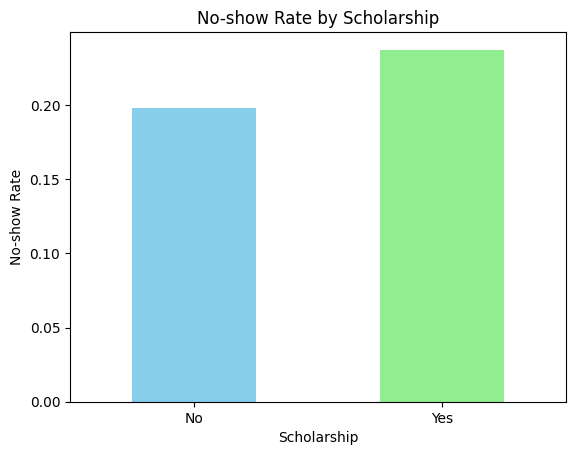

In [359]:
%matplotlib inline
scholarship_not_show_data_to_analyze = df[['Scholarship', 'No-show']].copy()
scholarship_no_show_mean = scholarship_not_show_data_to_analyze.groupby('Scholarship')['No-show'].mean()
# Plot the no-show rate (mean) by Scholarship
scholarship_no_show_mean.plot(kind='bar', color=['skyblue', 'lightgreen'])
pl.title('No-show Rate by Scholarship')
pl.xlabel('Scholarship')
pl.ylabel('No-show Rate')
pl.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
# Display the plot
pl.show()


In [360]:
# Print the Scholarship rates
print("Scholarship rates:")
print(scholarship_no_show_mean)
print("The mean value of the Scholarship column",np.mean(scholarship_not_show_data_to_analyze["Scholarship"]))
print("The standard deviation value of the Scholarship column",np.std(scholarship_not_show_data_to_analyze["Scholarship"]))

Scholarship rates:
Scholarship
False    0.198065
True     0.237363
Name: No-show, dtype: float64
The mean value of the Scholarship column 0.09827625209247613
The standard deviation value of the Scholarship column 0.2976878068835407


> `From the Plot we can indicate that the patients that have a scholarship they tend more likely to not show to the appointment, in the other hand the patients that did not have a scholarship they tend to show up to the appointment  `

>` Also from the value of the calculated mean and standard deviation for the scholarship column that show that the majority of the data points are clustered around the mean but with some variability`

<a id='conclusions'></a>
## Conclusions

> In the conclusion, first, the data was discovered and described to identify the attributes and their types. Any issues, such as incorrect data types or data that needed cleaning, were addressed. It was determined that there were several problems, including incorrect data types and the need to change some data types to categorical. Additionally, the value range of one attribute needed adjustment. These issues were resolved during the cleaning process, which involved changing data types, removing mismatched data, and eliminating unwanted attributes.

>  After analyzing the dataset and plotting data for each question, we can conclude that patients tend to show up for appointments, as indicated by the no-show column, which has a mean value of 0.20193616287720698. We also observed the impact of certain attributes on the likelihood of patients missing appointments, such as age, SMS receipt, and scholarship status. Specifically, younger patients, those with scholarships, and those who did not receive SMS reminders were more likely to miss appointments.

